<a href="https://colab.research.google.com/github/SELF-msselve/UTN-DataEngineering/blob/main/CEL_Extracci%C3%B3n_de_datos_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Definición de API**

En un restaurante, el mozo toma nota de lo que quiere el cliente y lo lleva al cocinero. Una vez que el cocinero ha preparado la comida pedida por el cliente, el mozo se lo lleva a la mesa. El cliente no debe preocuparse sobre como cocinar la comida ni interactúa directamente con la cocina.

De la misma forma, una API recibe una petición por parte de una aplicación. A continuación, interactúa con un servidor o base de datos ajena para recoger y procesar una respuesta, que luego se devuelve a la aplicación. Por último, el menú de un restaurante es la documentación de la API que describe lo que ofrece.

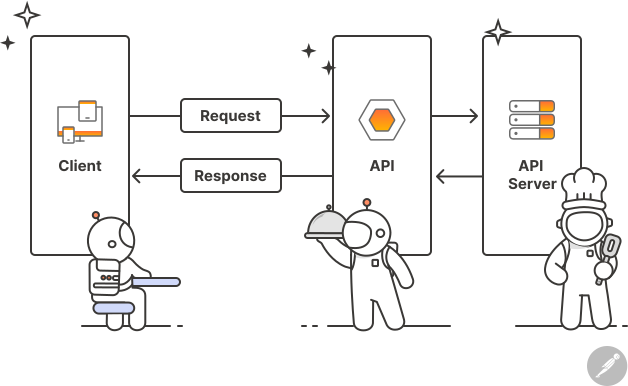

Las APIs son **interfaces** que permiten que distintos sistemas y aplicaciones se comuniquen y compartan información de manera eficiente. Al igual que los mozos, las APIs definen un conjunto de **reglas y métodos** que permiten la **interacción y el intercambio** de datos entre sistemas, lo que facilita la **integración** de diferentes componentes y servicios. Gracias a las APIs, las aplicaciones pueden **solicitar datos, enviar instrucciones y acceder a funcionalidades** de otros sistemas de manera segura y estructurada

### **REST API**
Es un tipo de API basada en la arquitectura REST (Representational State Transfer). REST permite la **transferencia de datos via internet**, utilizando el **protocolo HTTP**
Los recursos (funcionalidades, datos, etc) son accesibles a través de **endpoints**, y las operaciones se realizan sobre esos recursos con métodos HTTP estándar como:
- GET: para obtener datos,
- POST:para enviar datos y crear o insertar un nuevo recurso,
- PUT: para actualizar un recurso existente
- DELETE,
- entre otros.

#### **Código de estado**
Cuando hacemos una petición a una API y recibimos una respuesta, esa respuesta tendrá un código de estado para identificar el resultado de la petición.
Nos enfocaremos en los siguientes códigos:
- 2xx Petición exitosa
- 4xx Error de **cliente o aplicación**
- 5xx Error del **servidor**

#### **Ejemplos**
El siguiente link es la documentación de la API donde vemos ver los recursos o funcionalidades disponibles y como se debe interactuar con cada uno de los recursos.
[API Transporte de CABA](https://apitransporte.buenosaires.gob.ar/console/)

Otro ejemplo con una gran lista de APIs
[Lista de APIs](https://github.com/public-apis/public-apis)

En esta oportunidad, vamos a trabajar con la siguiente [API](https://api-docs.luchtmeetnet.nl/#7a6126f0-95c9-45f6-9552-6d97c9a418bf)
#### **Utilidades**
- Postman: Herramienta GUI para probar APIs
- cURL: Herramienta CLI para interactuar con APIs
- https://curlconverter.com/

## Vistazo rápido a requests

In [ ]:
!pip install requests

In [1]:
import requests
from pprint import pprint

In [ ]:
requests.get?

In [ ]:
requests.post?

In [ ]:
url = "https://api.github.com"
requests.get(url)

<Response [200]>

In [ ]:
r = requests.get('https://api.github.com')
type(r)

requests.models.Response

In [ ]:
dir(r)

In [ ]:
r.status_code

200

In [ ]:
r.json()

In [ ]:
data = r.json()

In [ ]:
type(data)

dict

In [ ]:
data["user_organizations_url"]

'https://api.github.com/user/orgs'

In [ ]:
data.keys()

dict_keys(['current_user_url', 'current_user_authorizations_html_url', 'authorizations_url', 'code_search_url', 'commit_search_url', 'emails_url', 'emojis_url', 'events_url', 'feeds_url', 'followers_url', 'following_url', 'gists_url', 'hub_url', 'issue_search_url', 'issues_url', 'keys_url', 'label_search_url', 'notifications_url', 'organization_url', 'organization_repositories_url', 'organization_teams_url', 'public_gists_url', 'rate_limit_url', 'repository_url', 'repository_search_url', 'current_user_repositories_url', 'starred_url', 'starred_gists_url', 'topic_search_url', 'user_url', 'user_organizations_url', 'user_repositories_url', 'user_search_url'])

In [ ]:
r = requests.get(
    'https://api.github.com/search/repositories',
    params={'q': 'requests+language:python'}
)

if r.status_code == 200:
  pprint(r.json())

In [ ]:
r.url

'https://api.github.com/search/repositories?q=requests%2Blanguage%3Apython'

In [ ]:
r = requests.get(
    'https://api.github.com/search/repositories',
    params={'q': 'requests+language:python'},
    headers={'Accept': 'application/vnd.github.v3.text-match+json'},
)
pprint(r.json())


{'incomplete_results': False,
 'items': [{'allow_forking': True,
            'archive_url': 'https://api.github.com/repos/SpiderLabs/secrules-language-evaluation/{archive_format}{/ref}',
            'archived': False,
            'assignees_url': 'https://api.github.com/repos/SpiderLabs/secrules-language-evaluation/assignees{/user}',
            'blobs_url': 'https://api.github.com/repos/SpiderLabs/secrules-language-evaluation/git/blobs{/sha}',
            'branches_url': 'https://api.github.com/repos/SpiderLabs/secrules-language-evaluation/branches{/branch}',
            'clone_url': 'https://github.com/SpiderLabs/secrules-language-evaluation.git',
            'collaborators_url': 'https://api.github.com/repos/SpiderLabs/secrules-language-evaluation/collaborators{/collaborator}',
            'comments_url': 'https://api.github.com/repos/SpiderLabs/secrules-language-evaluation/comments{/number}',
            'commits_url': 'https://api.github.com/repos/SpiderLabs/secrules-language-eval

In [ ]:
r.url

'https://api.github.com/search/repositories?q=requests%2Blanguage%3Apython'

## Hands on - Parte 1

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
def get_data(base_url, endpoint, params=None, headers=None):
    """
    Realiza una solicitud GET a una API para obtener datos.

    Parámetros:
    base_url (str): La URL base de la API.
    endpoint (str): El endpoint de la API al que se realizará la solicitud.
    params (dict): Parámetros de consulta para enviar con la solicitud.
    headers (dict): Encabezados para enviar con la solicitud.

    Retorna:
    dict: Los datos obtenidos de la API en formato JSON.
    """
    try:
        endpoint_url = f"{base_url}/{endpoint}"
        response = requests.get(endpoint_url, params=params, headers=headers)
        response.raise_for_status()  # Levanta una excepción si hay un error en la respuesta HTTP.

        # Verificar si los datos están en formato JSON.
        try:
            data = response.json()
            data = data["data"]
        except:
            print("El formato de respuesta no es el esperado")
            return None
        return data

    except requests.exceptions.RequestException as e:
        # Capturar cualquier error de solicitud, como errores HTTP.
        print(f"La petición ha fallado. Código de error : {e}")
        return None

def build_table(json_data):
    """
    Construye un DataFrame de pandas a partir de datos en formato JSON.

    Parámetros:
    json_data (dict): Los datos en formato JSON obtenidos de una API.

    Retorna:
    DataFrame: Un DataFrame de pandas que contiene los datos.
    """
    try:
        df = pd.json_normalize(json_data)
        return df
    except:
        print("Los datos no están en el formato esperado")
        return None

In [ ]:
base_url = "https://api.luchtmeetnet.nl/open_api"

In [ ]:
endpoint = "stations"

json_data = get_data(base_url, endpoint)
#pprint(json_data)
df = build_table(json_data)

In [ ]:
df.shape[0]

25

### Obtener datos de todas las estaciones

In [ ]:
# Obtener todas las estaciones
endpoint = "stations"
params = {"organisation_id": 1}

stations = get_data(base_url, endpoint, params=params)
if stations:
  df_stations = build_table(stations)

In [ ]:
df_stations.shape[0]

13

### Obtener detalles de cada estación

In [ ]:
# Obtener detalles de cada station
all_stations = []

for station in stations:
  endpoint = f"stations/{station['number']}"

  station_details = get_data(base_url, endpoint)
  if station_details:
    station_details["number"] = station["number"]
    all_stations.append(station_details)

In [ ]:
df_stations = build_table(all_stations)

In [ ]:
df_stations.head()

,type,components,municipality,url,province,organisation,location,year_start,number,geometry.type,geometry.coordinates,description.NL,description.EN
0,Regional,"[NO2, NO, LKI, PM10, PM25]",Rotterdam,None,None,DCMR (Rijnmond),Rotterdam-Maasvlakte,2020,NL01497,point,"[3.99972, 51.933517]",Rotterdam - Maasvlakte,Measuring site Maasvlakte
1,Other,"[C6H6, C7H8, FN, NO, NO2, O3, PM10, PM25, SO2]",Rotterdam,,None,DCMR (Rijnmond),Rotterdam-HvHolland,,NL01496,point,"[4.121944, 51.977802999084986]",Rotterdam Hoek van Holland,Rotterdam Hoek van Holland
2,Regional,"[NO2, PM10, PM25]",Ridderkerk,,None,DCMR (Rijnmond),Ridderkerk-Voorweg,2018,NL01912,point,"[4.563812, 51.861729]",Ridderkerk-Voorweg,Ridderkerk-Voorweg
3,Traffic,"[FN, NO, NO2, PM10, PM25]",Rotterdam,,None,DCMR (Rijnmond),Overschie-A13,,NL01491,point,"[4.4307, 51.93858]",Overschie-A13,Overschie-A13
4,Municipal,"[C6H6, C7H8, NO, NO2, O3, PM10, SO2, PM25]",Rotterdam,,None,DCMR (Rijnmond),Rotterdam-Hoogvliet,,NL01485,point,"[4.35524, 51.86742]",Rotterdam-Hoogvliet,Rotterdam-Hoogvliet


### Obtener mediciones de la última hora cada diferentes estaciones

In [ ]:
datetime.utcnow()

datetime.datetime(2024, 3, 8, 0, 20, 0, 1028)

In [ ]:
# Obtener mediciones

endpoint = "measurements"

start_date = datetime.utcnow() - timedelta(hours=1)

end_date = start_date.strftime("%Y-%m-%dT%H:59:59Z")
start_date = start_date.strftime("%Y-%m-%dT%H:00:00Z")

params = {
    "start": start_date,
    "end": end_date
    }

measurements = get_data(base_url, endpoint, params)
df_measurements = build_table(measurements)

In [ ]:
df_measurements.sort_values("timestamp_measured", ascending=True)

,station_number,value,timestamp_measured,formula
0,NL50002,46.00,2024-03-07T23:00:00+00:00,O3
287,NL01491,12.10,2024-03-07T23:00:00+00:00,NO2
286,NL01491,0.20,2024-03-07T23:00:00+00:00,NO
285,NL01495,32.00,2024-03-07T23:00:00+00:00,PM10
284,NL01495,25.30,2024-03-07T23:00:00+00:00,PM25
...,...,...,...,...
135,NL10444,7.40,2024-03-07T23:00:00+00:00,NO2
134,NL10444,0.11,2024-03-07T23:00:00+00:00,NO
133,NL10444,7.81,2024-03-07T23:00:00+00:00,NH3
157,NL10538,7.56,2024-03-07T23:00:00+00:00,NH3


## Hands on - Parte 2

Por lo general, las APIs requieren autenticación
Para acceder a sus recursos, es necesario autenticarse usando Key, por ejemplo.
Cada una API tiene su forma de brindarte la/s clave/s.

Es una buena práctica tener esas credenciales en un archivo aparte y no exponerlas en nuestro código fuente. Ese archivo suele denominarse *archivo de configuración*.

Existen distintas formas de usar archivos de configuración. A continuación trabajaremos con un archivo de extensión .conf. Es un archivo de texto plano, solo que con otra extensión.

A continuación, un ejemplo de como luce un archivo de configuración `pipeline.conf`

```
[api-credentials]
client_id = ValorDeClientID
client_secret = ValorDeClientSecret
```

En este archivo, podemos guardar las credenciales de distintos sistemas. Si quisieras agregar las credenciales de la base de datos, sería algo así

```
[api-credentials]
client_id = <reemplazalo por el client id correspondiente>
client_secret = <reemplazalo por el client secret correspondiente>

[mysql-db]
host = <reemplazalo por el host correspondiente>
port = <reemplazalo por el nro de puerto correspondiente
username = <reemplazalo por el username correspondiente>
password = <reemplazalo por la contraseña correspondiente>
...
```

Este archivo debe ser leído por Python, usando la librería standard configparser.

In [ ]:
from configparser import ConfigParser

# Instanciar un ConfigParser, que se encargará de leer el archivo config.ini
parser = ConfigParser()

parser.read("pipeline.conf")

# Acceder a la sección que tenga las credenciales necesarias y guardarlos en una variables
# En este caso, de la API
# api_keys sería algo similar a un Diccionario
api_credentials = parser["tmdb_api"]

In [ ]:
access_token = api_credentials["access_token"]
headers = {
    'Authorization': f'Bearer {access_token}',
    'accept': 'application/json',
}

In [ ]:
base_url = "https://api.themoviedb.org/3"

In [ ]:
response = requests.get('https://api.themoviedb.org/3/authentication', headers=headers)
response.json()

{'success': True, 'status_code': 1, 'status_message': 'Success.'}

In [ ]:
endpoint = "genre/movie/list"
data = requests.get(
    f"{base_url}/{endpoint}",
    headers=headers,
    params=params
    ).json()

In [ ]:
data

In [ ]:
genres = data["genres"]

In [ ]:
df_genres = build_table(data)
df_genres.head()

,genres
0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [ ]:
df_genres = build_table(genres)
df_genres.head()

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime


In [ ]:
endpoint = "genre/tv/list"
data = requests.get(
    f"{base_url}/{endpoint}",
    headers=headers,
    params=params
    ).json()
tv_genres = data["genres"]
df_genres_tv = build_table(tv_genres)
df_genres_tv.head()

,id,name
0,10759,Action & Adventure
1,16,Animation
2,35,Comedy
3,80,Crime
4,99,Documentary
